<a href="https://colab.research.google.com/github/Iryna-Lytvynchuk/Data_Science/blob/main/Hw5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp

In [2]:
a = 0.5
b = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t_0, t_f = 0, 25

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fb841589ad0>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None


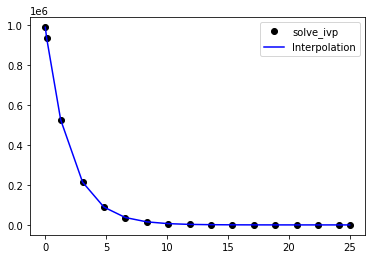

In [3]:
def dsdt(t, S):
    return -a * S

soln_s = solve_ivp(dsdt, (t_0, t_f), [S], dense_output=True)
print(soln_s)
t, y = soln_s.t, soln_s.y[0]
z, = soln_s.sol(t)
plt.plot(t, y, 'o', color='k', label='solve_ivp')
plt.plot(t, z, color='blue', label='Interpolation')
plt.legend()
plt.show()

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fb8410894d0>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.46534293e+00,
       3.30463452e+00, 5.49012015e+00, 8.32920731e+00, 1.14496758e+01,
       1.45701443e+01, 1.76449222e+01, 2.06395417e+01, 2.36032033e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.24492701,  79326.36974353,
        409578.08333031, 446699.01195741, 319077.83027796,
        165571.99131181,  71966.74863602,  29712.58392634,
         12130.57394039,   5009.75291416,   2075.26330114,
          1367.85128541]])
 y_events: None


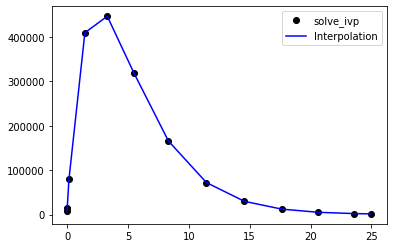

In [4]:
def didt(t, I, a, b):
    s = soln_s.sol(t)
    return a * s - b * I

soln_i = solve_ivp(didt, (t_0, t_f), [I], dense_output=True, args=(a, b))
print(soln_i)
t, y = soln_i.t, soln_i.y[0]
z, = soln_i.sol(t)
plt.plot(t, y, 'o', color='k', label='solve_ivp')
plt.plot(t, z, color='blue', label='Interpolation')
plt.legend()
plt.show()

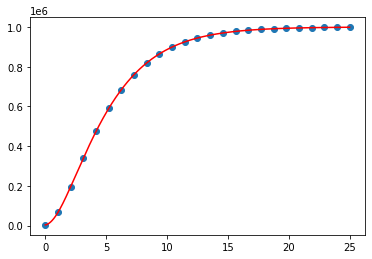

In [5]:
t = np.linspace(t_0,t_f, 25)
soln_r = []
for i in t:
  soln_r_r = N - soln_s.sol(i) - soln_i.sol(i)
  soln_r.append(soln_r_r[0])
f = interp1d(t, soln_r, kind='cubic')
plt.plot(t, soln_r, 'o')
more_t = np.linspace(0, 25, 1000000)
plt.plot(more_t, f(more_t), color='r')


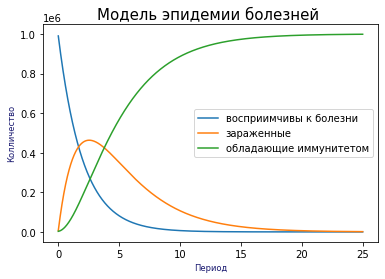

In [6]:
more_t = np.linspace(0, 25, 1000000)
st = soln_s.sol(more_t)
it = soln_i.sol(more_t)
fig, axs = plt.subplots()
axs.plot(more_t, st[0], label='восприимчивы к болезни')
axs.plot(more_t, it[0], label='зараженные')
axs.plot(more_t, f(more_t), label='обладающие иммунитетом')
plt.xlabel('Период', fontsize='small', color='midnightblue')
plt.ylabel('Колличество', fontsize='small', color='midnightblue')
plt.title('Модель эпидемии болезней ', fontsize=15)
plt.legend()
plt.show()

Hw5.2.ipynb

[ 0.          0.11486984  1.26356819  3.06043758  4.8157449   6.57363058
  8.33135596 10.08909132 11.84682607 13.60456089 15.36229578 17.12003086
 18.87776637 20.63550293 22.39324202 24.15098721 25.        ]
[9.90000000e+05 9.34741505e+05 5.26338915e+05 2.14449863e+05
 8.92016780e+04 3.70563463e+04 1.53952532e+04 6.39600686e+03
 2.65724217e+03 1.10395999e+03 4.58643792e+02 1.90545047e+02
 7.91625391e+01 3.28883086e+01 1.36635268e+01 5.67652784e+00
 3.71298656e+00]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


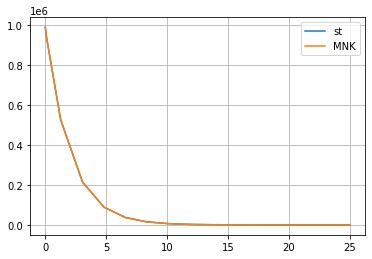

In [29]:
from scipy.optimize import leastsq
t = np.array(soln_s.t)
print(t)
y = np.array(soln_s.y[0])
print(y)
def f_s(t, a, s0):
    return s0 * np.exp(-a * t)

def diff_s(p, y, t):
    a, s0 = p
    return y - f_s(t, a, s0)

p0 = (1, 2)
aprx_s, _ = leastsq(diff_s, p0, args=(y, t))

y_p = aprx_s[1] * np.exp(-aprx_s[0] * t)
plt.grid()
plt.plot(t, y, label='st')
plt.plot(t, y_p, label='MNK')
plt.legend()

[0.00000000e+00 1.42016636e-02 1.56218300e-01 1.46534293e+00
 3.30463452e+00 5.49012015e+00 8.32920731e+00 1.14496758e+01
 1.45701443e+01 1.76449222e+01 2.06395417e+01 2.36032033e+01
 2.50000000e+01]
[  7000.          13960.24492701  79326.36974353 409578.08333031
 446699.01195741 319077.83027796 165571.99131181  71966.74863602
  29712.58392634  12130.57394039   5009.75291416   2075.26330114
   1367.85128541]


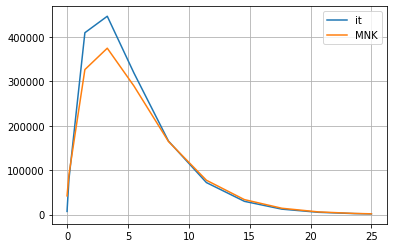

In [30]:
ti = np.array(soln_i.t)
print(ti)
yi = np.array(soln_i.y[0])
print(yi)
so = aprx_s[1]
def f_i(t, a, i0):
    return (i0 + a * so * t)* np.exp(-a * t)

def diff_i(p, y, t):
    a, i0 = p
    return y - f_i(t, a, i0)

p0 = (1, 2)
aprx_i, _ = leastsq(diff_i, p0, args=(yi, ti))

yi_p = (aprx_i[1] + aprx_i[0] * so * ti)* np.exp(-aprx_i[0] * ti)
plt.grid()
plt.plot(ti, yi, label='it')
plt.plot(ti, yi_p, label='MNK')
plt.legend()

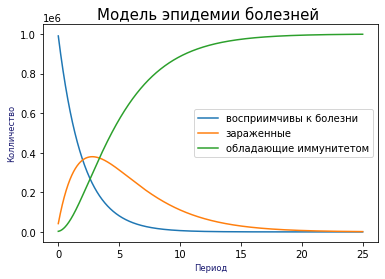

In [34]:
t = np.linspace(t_0,t_f, 25)
s_r = []
for i in t:
  s_r_r = N - (aprx_s[1] * np.exp(-aprx_s[0] * i)) - ((aprx_i[1] + aprx_i[0] * so * i)* np.exp(-aprx_i[0] * i))
  s_r.append(soln_r_r[0])

more_t = np.linspace(0, 25, 1000000)
st = aprx_s[1] * np.exp(-aprx_s[0] * more_t)
it = (aprx_i[1] + aprx_i[0] * so * more_t)* np.exp(-aprx_i[0] * more_t)
fig, axs = plt.subplots()
axs.plot(more_t, st, label='восприимчивы к болезни')
axs.plot(more_t, it, label='зараженные')
axs.plot(more_t, f(more_t), label='обладающие иммунитетом')
plt.xlabel('Период', fontsize='small', color='midnightblue')
plt.ylabel('Колличество', fontsize='small', color='midnightblue')
plt.title('Модель эпидемии болезней ', fontsize=15)
plt.legend()
plt.show()

In [40]:
from scipy.optimize import minimize_scalar
a = aprx_i[0]
i0 = aprx_i[1]
t_max = minimize_scalar(lambda more_t, a, i0: -f_i(more_t, a, i0), bracket=(0, 5, 10), args=(a, i0))

print(t_max)

     fun: -379979.0454441463
    nfev: 16
     nit: 12
 success: True
       x: 2.7891480413712637
